# Pelota que cae

Las ecuacuaciones de Newton son:

$m \frac{d^2\vec r}{dt^2}=-g \hat k + \vec f_{fricc} + \vec f_{ext}$

In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

/home/sumem/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [17]:
#en una funcion se pueden poner argumentos opcionales
#para esto se usa el igual
def fuerza(v_r,t,gama=0,viento=[0,0],m=1,g=9.8):
    #g = 9.8
    #m=1.
    #gama = 0.1
    #v_r = [ry, rz, vy, vz]
    dvz = -g/m - (gama/m)*v_r[3]+viento[1]
    dvy = 0 - (gama/m)*v_r[2]+viento[0]
    drz = v_r[3]
    dry = v_r[2]
    return [dry,drz,dvy,dvz]

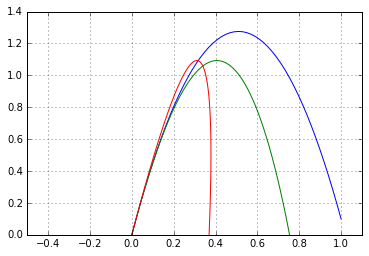

In [3]:
tiempo = linspace(0,1)
s_ideal = odeint(fuerza,[0,0,1,5],tiempo)
y_id,z_id= s_ideal[:,0],s_ideal[:,1]

s_fric = odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,))
y_fric,z_fric= s_fric[:,0],s_fric[:,1]

s_fric_viento = odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,[-1,0],))
y_f_v,z_f_v= s_fric_viento[:,0],s_fric_viento[:,1]


plot(y_id,z_id,y_fric,z_fric,y_f_v,z_f_v)
xlim([-.5,1.1])
ylim([0,1.4])
grid(True)
show()

In [18]:
def pedazo_trayectoria(pto_ini,dt=0.1,param=[0,[0,0],1,9.8]):
    tiempo = array([0,dt])
    sol = odeint(fuerza,pto_ini,tiempo,args=(param[0],param[1],param[2],param[3],))
    return sol  

In [56]:
def rebote(punto,dt,param):
    error =1e-5
    dt = dt/2
    sol = odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1])> error:
        if sol[:,1][0]*sol[:,1][1]<0:
            punto= sol[0]
        else:
            punto= sol[1]
        dt = dt/2
        sol = odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
        #print sol[0]
    return [sol[0][0],sol[0][1],sol[0][2],-sol[0][3]]

In [57]:
def trayectoria(pto_ini,t_fin,param=[0,[0,0],1,9.8]):
    t_total, dt = [0],0.05
    y=[pto_ini[0]]
    z=[pto_ini[1]]
    t_actual = 0
    while t_actual <= t_fin:
        t_actual = t_actual + dt
        sol = odeint(fuerza,pto_ini,[0,dt],args=(param[0],param[1],param[2],param[3],))
        if sol[:,1][0]*sol[:,1][1]<0:
            sol = rebote(sol[0],dt,param)
            y.append(sol[0])
            z.append(sol[1])
            pto_ini=sol
        else:
            y.append(sol[:,0][1])
            z.append(sol[:,1][1])
            pto_ini=sol[1]
    return y,z

[ 1.          0.09999999  1.         -4.8       ]
[ 1.0125      0.03923437  1.         -4.9225    ]
[ 1.01875     0.00827734  1.         -4.98375   ]
[ 1.01875     0.00827734  1.         -4.98375   ]
[  1.02031250e+00   4.78264466e-04   1.00000000e+00  -4.99906250e+00]
[  1.02031250e+00   4.78264466e-04   1.00000000e+00  -4.99906250e+00]
[  1.02031250e+00   4.78264466e-04   1.00000000e+00  -4.99906250e+00]
[  1.02031250e+00   4.78264466e-04   1.00000000e+00  -4.99906250e+00]
[  1.02031250e+00   4.78264466e-04   1.00000000e+00  -4.99906250e+00]
[  1.02036133e+00   2.34157935e-04   1.00000000e+00  -4.99954102e+00]
[  1.02038574e+00   1.12095907e-04   1.00000000e+00  -4.99978027e+00]
[  1.02039795e+00   5.10627029e-05   1.00000000e+00  -4.99989990e+00]
[  1.02040405e+00   2.05455532e-05   1.00000000e+00  -4.99995972e+00]
[  1.02040710e+00   5.28684140e-06   1.00000000e+00  -4.99998962e+00]
[ 0.7405852   0.08839593  0.6297074  -4.10919797]
[ 0.748432    0.03642712  0.625784   -4.20571356]


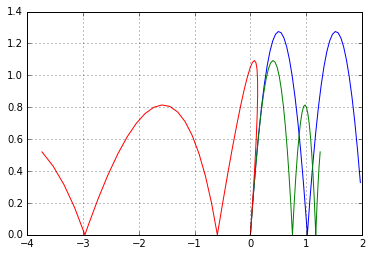

In [74]:
y1,z1=trayectoria([0,0,1,5],2)
y2,z2=trayectoria([0,0,1,5],2,[0.5,[0,0],1,9.8])
y3,z3=trayectoria([0,0,1,5],2,[0.5,[-3.5,0],1,9.8])
plot(y1,z1,y2,z2,y3,z3)
grid(True)
show()